In [10]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [30]:
# Read Excel file and convert it to CSV
excel_file = '../../../Data_Thesis/CNS/Data/GOM22SU_ST.5B_PWD_areas.XLS'
csv_file = '../../../Data_Thesis/CNS/Data/GOM22SU_ST.5B_PWD_areas.csv'
df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False, header=False)

# Read CSV file and create a DataFrame
column_names = ['name', 'file', 'date', 'time', 'type', 'wtd', 'Unnamed_1', 'Unnamed_2', 'Unnamed_3','Unnamed_4', 'N_area', 'C_area', 'S_area']  # Replace with your desired column names
df = pd.read_csv(csv_file, names=column_names)

# Now you can work with the DataFrame
CAMP = "GOM22SU" 
STN = "St.7"
TREAT = "PWD"

Save_name = '../../../Data_Thesis/CNS/Data/GOM22SU_ST.5B_PWD.csv'

In [31]:
# Calculate mean for rows where type is blank
blank_rows = df[df['type'] == 'Blank']
mean_values = blank_rows[['C_area', 'N_area', 'S_area']].mean()

# Subtract mean from respective columns and create new rows
df['N_area_bl'] = df['N_area'] - mean_values['N_area']
df['C_area_bl'] = df['C_area'] - mean_values['C_area']
df['S_area_bl'] = df['S_area'] - mean_values['S_area']

In [32]:
# Calculate C N S wights 
std = df[df['type'] == 'STD']

# Subtract mean from respective columns and create new rows
std['N_wtd'] = std['wtd'] * .0652
std['C_wtd'] = std['wtd'] * .725
std['S_wtd'] = std['wtd'] * .0746

std

C:\Users\12532\AppData\Local\Temp\ipykernel_4888\2823902847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['N_wtd'] = std['wtd'] * .0652
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\2823902847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['C_wtd'] = std['wtd'] * .725
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\2823902847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area,N_area_bl,C_area_bl,S_area_bl,N_wtd,C_wtd,S_wtd
0,low,DfchA007,05/31/2023,16:27,STD,1.016,6.25,0.0,NaN,NaN,1.474371e+05,4168980.0,174390.0,1.351478e+05,4.155957e+06,175115.086806,0.066243,0.736600,0.075794
0,mid,DfchA008,05/31/2023,16:39,STD,2.843,6.25,0.0,NaN,NaN,4.802912e+05,11586968.0,492559.0,4.680019e+05,1.157395e+07,493284.086806,0.185364,2.061175,0.212088
0,high,DfchA009,05/31/2023,16:51,STD,5.866,6.25,0.0,NaN,NaN,1.570150e+06,21801186.0,994939.0,1.557860e+06,2.178816e+07,995664.086806,0.382463,4.252850,0.437604


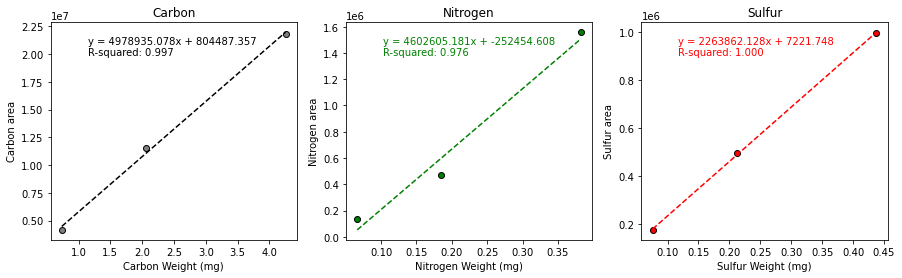

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(std['C_wtd'], std['C_area_bl'], facecolor='grey', edgecolor='black')
x = std['C_wtd']
y = std['C_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Carbon Weight (mg)')
ax.set_ylabel('Carbon area')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(std['N_wtd'], std['N_area_bl'], facecolor='green', edgecolor='black')
x = std['N_wtd']
y = std['N_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Nitrogen Weight (mg)')
ax.set_ylabel('Nitrogen area')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(std['S_wtd'], std['S_area_bl'], facecolor='red', edgecolor='black')
x = std['S_wtd']
y = std['S_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Sulfur Weight (mg)')
ax.set_ylabel('Sulfur area')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

# show plot
plt.show()

In [35]:
y = std['C_wtd']
x = std['C_area_bl']
C_coefficients = np.polyfit(x, y, 1)
C_slope = C_coefficients[0]

y = std['N_wtd']
x = std['N_area_bl']
N_coefficients = np.polyfit(x, y, 1)
N_slope = N_coefficients[0]

y = std['S_wtd']
x = std['S_area_bl']
S_coefficients = np.polyfit(x, y, 1)
S_slope = S_coefficients[0]

print(f"SLOPE")
print(f"Carbon slope:   {C_slope}")
print(f"Nitrogen slope: {N_slope}")
print(f"Sulfur slope:   {S_slope}")
print(f"")

# Subtract mean from respective columns and create new rows
df['N_wtd'] = df['N_area_bl'] * N_slope
df['C_wtd'] = df['C_area_bl'] * C_slope
df['S_wtd'] = df['S_area_bl'] * S_slope

# Subtract mean from respective columns and create new rows
df['N%'] = df['N_wtd'] / df['wtd'] *100
df['C%'] = df['C_wtd'] / df['wtd'] *100
df['S%'] = df['S_wtd'] / df['wtd'] *100

cs = df[df['name'].str.contains('CS')]
cs['cs_N%'] = cs['N%']/.0652
cs['cs_C%'] = cs['C%']/.725
cs['cs_S%'] = cs['S%']/.0746

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])


SLOPE
Carbon slope:   2.0034210479730466e-07
Nitrogen slope: 2.119817541375755e-07
Sulfur slope:   4.4165368802749445e-07

Check Standerd % est
Nitrogen
0    47.688604
0    48.667419
Name: cs_N%, dtype: float64
Carbon
0    112.296281
0    113.260323
Name: cs_C%, dtype: float64
Sulfer
0    100.553879
0    100.956940
Name: cs_S%, dtype: float64


C:\Users\12532\AppData\Local\Temp\ipykernel_4888\3713983456.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_N%'] = cs['N%']/.0652
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\3713983456.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_C%'] = cs['C%']/.725
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\3713983456.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [36]:
ds = df[df['name'].str.contains('ST')]
ds['ID'] = ds['name'].str[-2:]
ds['Treat'] = CAMP
ds['Camp'] = TREAT
ds['Station'] = STN
ds['notes'] = "N STD BAD"

selected_columns = ['ID', 'Treat', 'Camp', 'Station', 'N%', 'C%', 'S%', 'notes']
ds = ds[selected_columns]

ds.to_csv(Save_name, index=False, header=True)
ds

C:\Users\12532\AppData\Local\Temp\ipykernel_4888\880213626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['ID'] = ds['name'].str[-2:]
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\880213626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Treat'] = CAMP
C:\Users\12532\AppData\Local\Temp\ipykernel_4888\880213626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,ID,Treat,Camp,Station,N%,C%,S%,notes
0,01,GOM22SU,PWD,St.7,0.017423,1.213397,0.250751,N STD BAD
0,02,GOM22SU,PWD,St.7,0.019280,1.227571,0.195677,N STD BAD
0,03,GOM22SU,PWD,St.7,0.001156,0.880194,0.092792,N STD BAD
0,04,GOM22SU,PWD,St.7,0.008805,1.070008,0.169793,N STD BAD
0,05,GOM22SU,PWD,St.7,0.010248,1.173532,0.183328,N STD BAD
0,06,GOM22SU,PWD,St.7,0.021870,1.343352,0.197805,N STD BAD
0,07,GOM22SU,PWD,St.7,0.027262,1.386921,0.207734,N STD BAD
0,08,GOM22SU,PWD,St.7,0.025486,1.443537,0.219406,N STD BAD
0,09,GOM22SU,PWD,St.7,0.011294,1.093117,0.156269,N STD BAD
0,10,GOM22SU,PWD,St.7,-0.000740,0.969174,0.089843,N STD BAD
